In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# read the input data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
# one hot encoding
insurance_one_hot = pd.get_dummies(insurance, columns=["sex", "smoker", "region"])
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [45]:
# Create features and labels
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [46]:
# Split train and test data
from operator import le
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5322 - mae: 3494.5322


Text(0.5, 0, 'epoch')

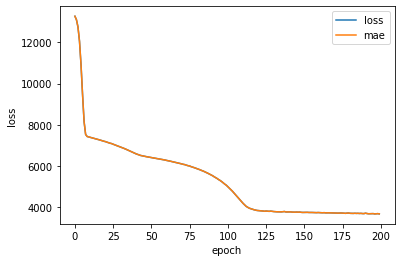

In [47]:
# Build a neural network
from statistics import mode


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.MAE, 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model.fit(x_train, y_train, epochs=200, verbose=0)

# Check the results
model.evaluate(x_test, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")

<AxesSubplot:ylabel='Frequency'>

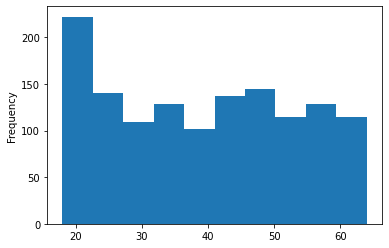

In [48]:
X["age"].plot(kind="hist")

In [49]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["smoker", "sex", "region"])
)

x = insurance.drop("charges", axis=1)
y = insurance["charges"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)
len(x), len(x_train), len(x_test)

# Fit the column transformer to train data only
ct.fit(x_train)

# Transform training and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [58]:
x_train.loc[0], x_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

9/9 [==============================] - 0s 4ms/step - loss: 3170.4316 - mae: 3170.4316


Text(0.5, 0, 'epoch')

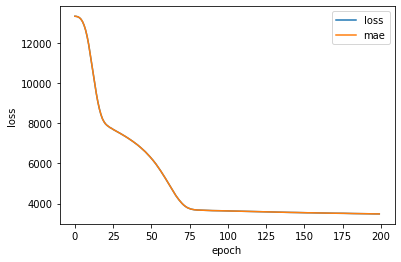

In [61]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history = model.fit(x_train_normal, y_train, epochs=200, verbose=0)

# Check the results
model.evaluate(x_test_normal, y_test)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")